In [7]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(mean_squared_error(np.array(y1), np.array(t)))
print(mean_squared_error(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


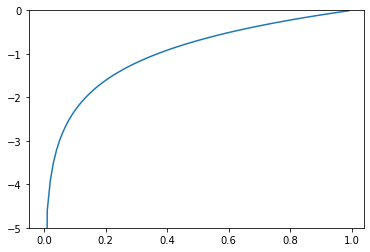

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 1.0, 0.01)
delta = 1e-7
y = np.log(x+ delta)

plt.plot(x, y)
plt.ylim(-5.0, 0.0)
plt.show()

In [15]:
import numpy as np

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(cross_entropy_error(np.array(y1), np.array(t)))
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.3025840929945454


In [16]:
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [17]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [19]:
np.random.choice(60000, 10)

array([21291, 21731,  2186, 36678, 15285, 31120, 17141, 11639, 12222,
       43853])

In [20]:
np.random.choice(60000, 10)

array([12091, 55913, 52175, 59762, 21304,  1036,  2933, 44180, 30985,
        4519])

In [21]:
np.random.choice(60000, 10)

array([43701, 45629,  6351,  2512, 26577, 55952, 43749, 27467, 17077,
       58210])

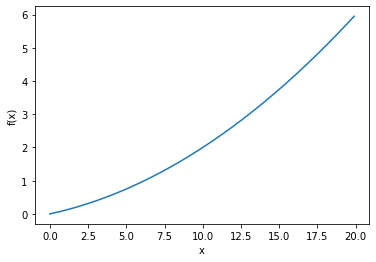

In [2]:
import numpy as np
import matplotlib.pylab as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h) 

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()



In [3]:
numerical_diff(function_1, 5)

0.1999999999990898

In [4]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898
0.2999999999986347


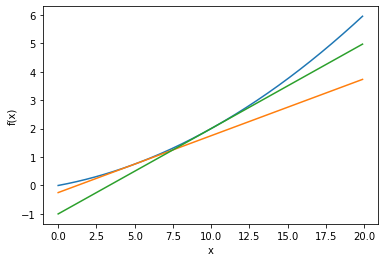

In [1]:
import numpy as np
import matplotlib.pylab as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h) 

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf1 = tangent_line(function_1, 5)
y2 = tf1(x)

tf2 = tangent_line(function_1, 10)
y3 = tf2(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

In [9]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [3]:
def function_tmp1(x0):
    return x0**2.0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [4]:
def function_tmp2(x1):
    return 3.0**2.0 + x1**2.0

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [15]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for i in range(x.size):
        tmp_val = x[i]
        
        # calc f(x + h)
        x[i] = tmp_val + h
        fxh1 = f(x)
        
        # calc f(x - h)
        x[i] = tmp_val - h
        fxh2 = f(x)
        
        grad[i] = (fxh1 - fxh2) / (2*h)
        x[i] = tmp_val
        
    return grad

# x[0]について偏微分するとき、
# x[1]の項はf(x + h)とf(x - h)の計算時に定数項として同じ値になり、
# grad[0]の分母において、引き算で相殺される。
# x[1]について偏微分するときも同様。

In [12]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [13]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [16]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

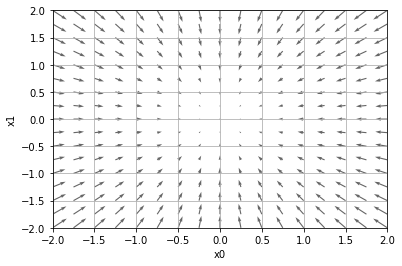

In [17]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

In [18]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [21]:
x_init = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=x_init, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [22]:
# case when learning rate is too learge
x_init = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=x_init, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [23]:
# case when learning rate is too small
x_init = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=x_init, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.27038603  0.27113234 -0.54151837]
 [ 0.40557904  0.40669851 -0.81227755]]


In [2]:
net = simpleNet()

In [3]:
print(net.W)

[[ 0.22482127  0.34332672  0.85623606]
 [ 2.50568838 -0.45180151 -0.33570948]]


In [4]:
x = np.array([0.6, 0.9])

In [5]:
p = net.predict(x)

In [6]:
print(p)

[ 2.39001231 -0.20062532  0.21160311]


In [7]:
np.argmax(p)

0

In [8]:
t = np.array([0, 0, 1])

In [9]:
net.loss(x, t)

2.350842424538015

In [10]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.50496763  0.03785854 -0.54282618]
 [ 0.75745145  0.05678782 -0.81423927]]


In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [12]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [5]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [6]:
t = np.random.rand(100, 10)

In [10]:
grads = net.numerical_gradient(x, t)

In [11]:
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.7902666666666667, 0.7972
train acc, test acc | 0.8749833333333333, 0.8785
train acc, test acc | 0.89885, 0.9013
train acc, test acc | 0.9076, 0.911
train acc, test acc | 0.91385, 0.9164
train acc, test acc | 0.9192333333333333, 0.9215
train acc, test acc | 0.9235, 0.9271
train acc, test acc | 0.9275666666666667, 0.9286
train acc, test acc | 0.93085, 0.9323
train acc, test acc | 0.9342, 0.9349
train acc, test acc | 0.9367833333333333, 0.9374
train acc, test acc | 0.9398, 0.9403
train acc, test acc | 0.94145, 0.9407
train acc, test acc | 0.9434, 0.9425
train acc, test acc | 0.9456833333333333, 0.9448
train acc, test acc | 0.9470166666666666, 0.9454


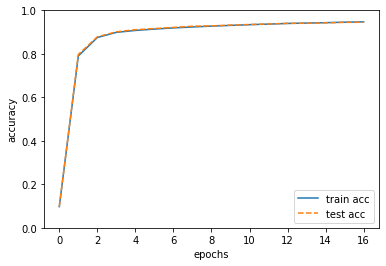

In [14]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [15]:
print(train_size)

60000


# 2022/06/07 復習

### 4.1.2 訓練データとテストデータ

* 訓練データ（教師データ）：学習（訓練）を行う（最適なパラメータを決める）ためのデータ
* テストデータ：訓練したモデルの実力を評価するためのデータ

## 4.2 損失関数（loss function）

一般には以下２つが使われる。

* 2乗和誤差
* 交差エントロピー誤差

### 4.2.1 2乗和誤差（mean squared error）

値が0に近いほど、そのモデルが適合していることを表す。

In [2]:
y = [0.1, 0.05, 0.06, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [5]:
len(y)

10

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [9]:
len(t)

10

In [17]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

### 4.2.2 交差エントロピー誤差（cross entropy error）

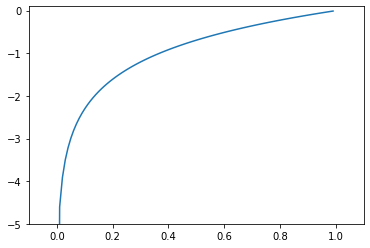

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 1.0, 0.01)
delta = 1e-7
y = np.log(x + delta)

plt.plot(x, y)
plt.xlim(-0.1, 1.1)
plt.ylim(-5.0, 0.1)
plt.show()

In [25]:
import numpy as np

def cross_entropy_error(y, t):
    delta = 1e-7 # np.log(0)を計算すると -inf になることを防ぐため
    return -np.sum(t * np.log(y + delta))

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

### 4.2.3 ミニバッチ学習

* 例えば交差エントロピー誤差においては、入力データ数Nに対し、各入力データの交差エントロピー誤差を足してNで割ったものを利用する
    * 「損失関数の平均」という考え方
    * 中央値などは見なくてもいいのだろうか...？
* MNISTデータセットはデータの個数が60,000個もある。
    * 場合によっては、数百万、数千万という数のデータを使うことも
    * 計算量が大きくなり、すべてのデータに対し損失関数を求めることは不可となるケースもある
    * そこで、全データから一部を抜き出し、抜き出したデータを全体の「近似」として利用する
        * これを **「ミニバッチ」** という

In [31]:
import sys
import os
import numpy as np

sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

(60000, 784)
(60000, 10)
[17329 51148 52773  6671 51126  8688 53739 40000 38250 42364]


### 4.2.4 [バッチ対応版] 交差エントロピー誤差の実装

In [32]:
def cross_entropy_error(y, t):
    delta = 1e-7
    
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + delta)) / batch_size